<a href="https://colab.research.google.com/github/alicancode/DL-with-Python-Chapter-3-NN-examples/blob/main/Reuters_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Reuters Dataset basic implementation using Keras**

In [140]:
from keras.datasets import reuters
import numpy as np

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words = 10000)

In [141]:
print(train_data[0])


[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]


In [142]:
print(train_labels[0])

3


In [143]:
def vectorize_sequences(sequences, dimension = 10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1.
  return results


In [144]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)


In [145]:
print(train_data.shape)
print(x_train.shape)

print(train_labels.shape)


(8982,)
(8982, 10000)
(8982,)


In [146]:
def to_one_hot(labels, dimensions = 46):
  results = np.zeros((len(labels), dimensions))
  for i, label in enumerate(labels):
    results[i, label] = 1.
  return results

In [147]:
#one_hot_train_labels = to_one_hot(train_labels)
#one_hot_test_labels = to_one_hot(test_labels)

In [148]:
y_train = np.array(train_labels)
y_test = np.array(test_labels)

print(y_train.shape)

(8982,)


In [ ]:
#from keras.utils.np_utils import to_catagorical
#one_hot_train_labels = to_catagorical(train_labels)
#one_hot_test_labels = to_catagorical(test_labels)

In [149]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Dense(64,activation = 'relu', input_shape = (10000,)))
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dense(46, activation = 'softmax'))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [150]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = y_train[:1000]
partial_y_train = y_train[1000:]


print(f'train_data: {train_labels.shape}')
print(f'x_train: {x_train.shape}')
print(f'y_train: {y_train.shape}')
print(f'x_val: {x_val.shape}')
print(f'y_val: {y_val.shape}')
print(f'partial_x: {partial_x_train.shape}')
print(f'partial_y: {partial_y_train.shape}')

train_data: (8982,)
x_train: (8982, 10000)
y_train: (8982,)
x_val: (1000, 10000)
y_val: (1000,)
partial_x: (7982, 10000)
partial_y: (7982,)


In [151]:
model.compile(optimizer = 'rmsprop', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [152]:
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size = 512, validation_data=(x_val, y_val))

Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 110ms/step - accuracy: 0.3442 - loss: 3.2192 - val_accuracy: 0.6010 - val_loss: 1.8587
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - accuracy: 0.6483 - loss: 1.6576 - val_accuracy: 0.6820 - val_loss: 1.3918
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - accuracy: 0.7234 - loss: 1.2453 - val_accuracy: 0.7270 - val_loss: 1.1919
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - accuracy: 0.7732 - loss: 1.0219 - val_accuracy: 0.7650 - val_loss: 1.0711
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - accuracy: 0.8258 - loss: 0.8255 - val_accuracy: 0.7910 - val_loss: 0.9988
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - accuracy: 0.8551 - loss: 0.6861 - val_accuracy: 0.7870 - val_loss: 0.9594
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - accuracy: 0.8710 - loss: 0.5916 - val_accuracy: 0.8160 - val_loss: 0.9059
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - accuracy: 0.9031 - loss: 0.4722 - val_accuracy: 0.8090 - 

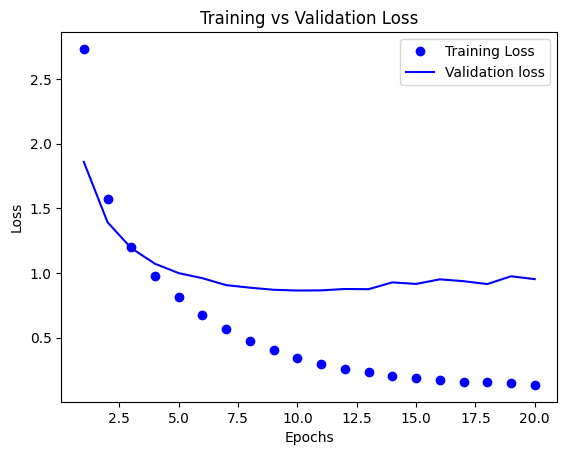

In [153]:
import matplotlib.pyplot as plt
loss =  history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss)+1)
plt.plot(epochs, loss, 'bo', label = 'Training Loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training vs Validation Loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

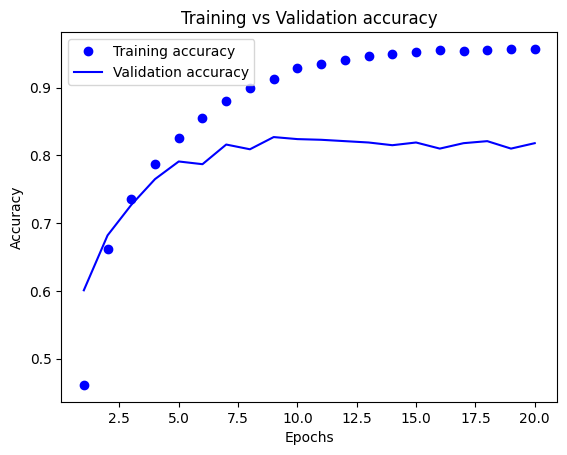

In [154]:
plt.clf()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'bo', label = 'Training accuracy')
plt.plot(epochs, val_acc, 'b', label = 'Validation accuracy' )
plt.title('Training vs Validation accuracy')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

In [158]:
predictions =  model.predict(x_test)


71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


3